In [53]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv("twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [57]:
data.columns = ['ID', 'Game', 'Sentiment', 'Tweet']
data.head()

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [59]:
data.isnull().sum()

ID             0
Game           0
Sentiment      0
Tweet        686
dtype: int64

In [61]:
data.fillna('')

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [63]:
data['Tweet'].astype(str)

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: Tweet, Length: 74681, dtype: object

In [65]:
data['Tweet'] = data['Tweet'].astype(str).fillna('')

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^A-Za-z0-9 ]+', '', tweet)
    tweet = tweet.lower()
    return tweet

data['Cleaned_Tweet'] = data['Tweet'].apply(clean_tweet)

In [67]:
data['Polarity'] = data['Cleaned_Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Cleaned_Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [69]:
data.head()

,ID,Game,Sentiment,Tweet,Cleaned_Tweet,Polarity,Subjectivity
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,0.0,0.0
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,0.0,0.0
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,0.0,0.0
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,0.0,0.0
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,0.0,0.0


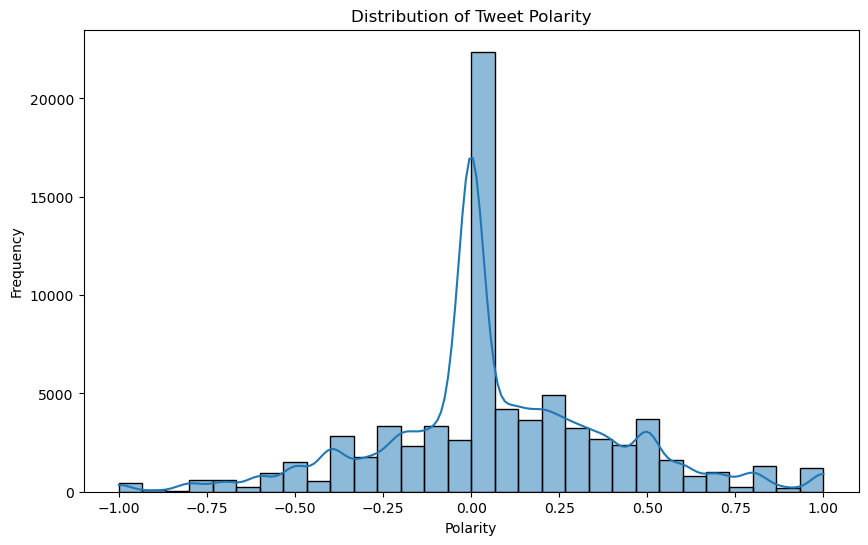

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Polarity'], bins=30, kde=True)
plt.title('Distribution of Tweet Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

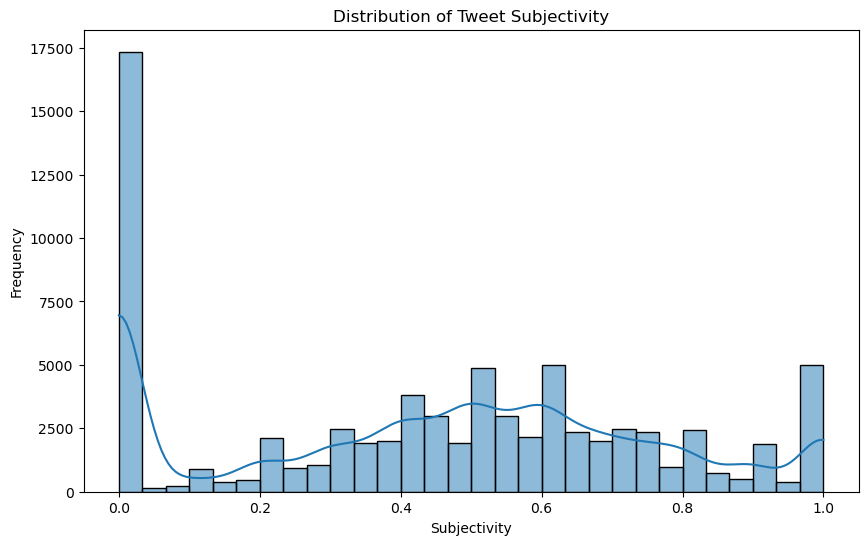

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Subjectivity'], bins=30, kde=True)
plt.title('Distribution of Tweet Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()